# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key="fc42678069ede86c638ce3ea62adf5d3a23059f0")

C:\Users\roshika\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-01 00:00:00+00:00,201.50,201.76,197.31,199.13,67935716,48.138087,48.200200,47.137101,47.571897,271742864,0.0,1.0
1,AAPL,2018-08-02 00:00:00+00:00,207.39,208.38,200.35,200.58,62404012,49.545200,49.781710,47.863353,47.918300,249616048,0.0,1.0
2,AAPL,2018-08-03 00:00:00+00:00,207.99,208.74,205.48,207.03,33447396,49.688539,49.867713,49.088903,49.459196,133789584,0.0,1.0
3,AAPL,2018-08-06 00:00:00+00:00,209.07,209.25,207.07,208.00,25425387,49.946550,49.989551,49.468752,49.690928,101701548,0.0,1.0
4,AAPL,2018-08-07 00:00:00+00:00,207.11,209.50,206.76,209.32,25587387,49.478308,50.049276,49.394694,50.006274,102349548,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-24 00:00:00+00:00,192.75,194.910,192.250,193.41,45505097,192.75,194.910,192.250,193.41,45505097,0.0,1.0
1252,AAPL,2023-07-25 00:00:00+00:00,193.62,194.440,192.915,193.33,37283201,193.62,194.440,192.915,193.33,37283201,0.0,1.0
1253,AAPL,2023-07-26 00:00:00+00:00,194.50,195.640,193.320,193.67,47471868,194.50,195.640,193.320,193.67,47471868,0.0,1.0
1254,AAPL,2023-07-27 00:00:00+00:00,193.22,197.200,192.550,196.02,47460180,193.22,197.200,192.550,196.02,47460180,0.0,1.0
1255,AAPL,2023-07-28 00:00:00+00:00,195.83,196.626,194.140,194.67,48291443,195.83,196.626,194.140,194.67,48291443,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1.shape

(1256,)

In [11]:
df1

0       201.50
1       207.39
2       207.99
3       209.07
4       207.11
         ...  
1251    192.75
1252    193.62
1253    194.50
1254    193.22
1255    195.83
Name: close, Length: 1256, dtype: float64

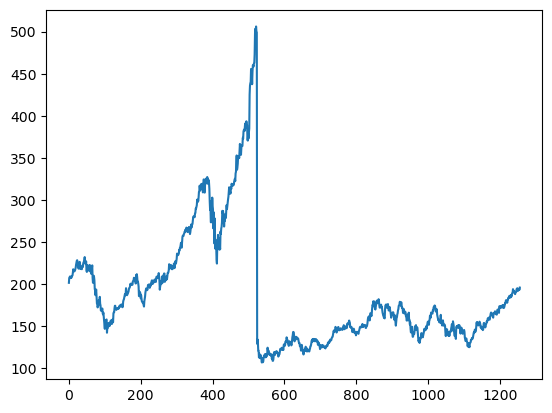

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
df1

0       201.50
1       207.39
2       207.99
3       209.07
4       207.11
         ...  
1251    192.75
1252    193.62
1253    194.50
1254    193.22
1255    195.83
Name: close, Length: 1256, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(1256, 1)

In [18]:
df1

array([[0.23709455],
       [0.25184721],
       [0.25335003],
       ...,
       [0.21956168],
       [0.21635567],
       [0.22289292]])

In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(816, 440)

In [21]:
train_data

array([[2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],
       [2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 325ms/step - loss: 0.0404 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0120 - val_loss: 0.0012
Epoch 3/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0092 - val_loss: 4.8416e-04
Epoch 4/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0086 - val_loss: 3.2692e-04
Epoch 5/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0079 - val_loss: 9.8492e-04
Epoch 6/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0073 - val_loss: 6.4314e-04
Epoch 7/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0066 - val_loss: 3.3387e-04
Epoch 8/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0059 - val_loss: 2.9590e-04
Epoch 9/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0055 - val_loss: 4.2561e-04
Epoch 10/100
12/12 [==============================] - 2s 167ms/

12/12 [==============================] - 2s 178ms/step - loss: 0.0015 - val_loss: 2.5986e-04
Epoch 79/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0012 - val_loss: 2.3096e-04
Epoch 80/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0013 - val_loss: 2.1637e-04
Epoch 81/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0012 - val_loss: 2.2700e-04
Epoch 82/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0011 - val_loss: 2.0555e-04
Epoch 83/100
12/12 [==============================] - 2s 165ms/step - loss: 0.0013 - val_loss: 3.1131e-04
Epoch 84/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0039 - val_loss: 2.2839e-04
Epoch 85/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0032 - val_loss: 2.1265e-04
Epoch 86/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0024 - val_loss: 1.9757e-04
Epoch 87/100
12/12 [==============================] - 2s 18

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.13.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 31ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.5110684294236

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.81953787841118

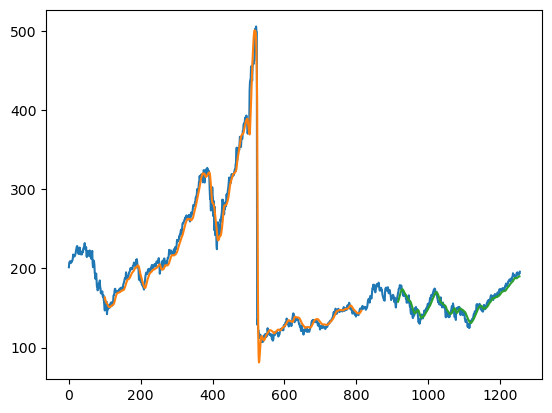

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

440

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.1675892298058

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.218

10 day output [[0.19625905]]
11 day input [0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202
 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374
 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428
 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755
 0.21956168 0.21635567

20 day output [[0.18338042]]
21 day input [0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.20940772
 0.20940772 0.2089695  0.20807162 0.20694767 0.20570345 0.20439795
 0.2030613  0.2017085

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
len(df1)

1256

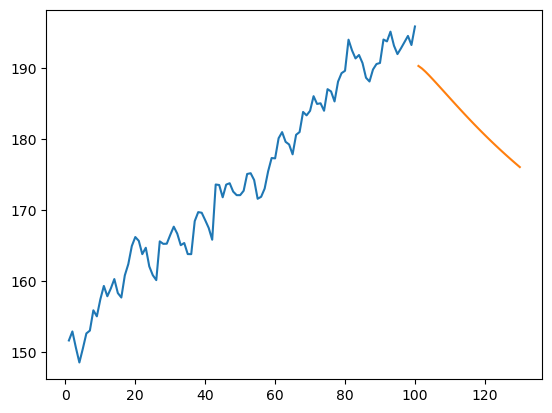

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

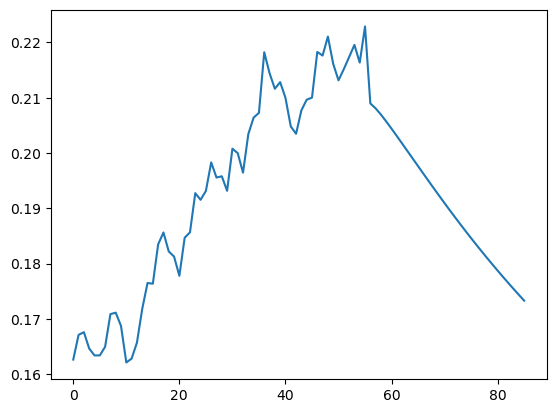

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

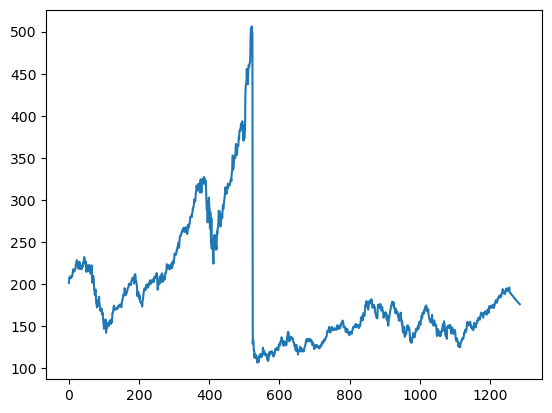

In [52]:
plt.plot(df3)